In [5]:
import numpy as np

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))
print(Y.shape)
X_train = X[: n // 2]
Y_train = Y[: n // 2]
X_test = X[n // 2 :]
Y_test = Y[n // 2 :]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

(500, 4)
Corr(X)
[[ 1.    0.54 -0.03  0.02]
 [ 0.54  1.   -0.01  0.05]
 [-0.03 -0.01  1.    0.51]
 [ 0.02  0.05  0.51  1.  ]]
Corr(Y)
[[ 1.    0.44  0.01  0.02]
 [ 0.44  1.   -0.03  0.03]
 [ 0.01 -0.03  1.    0.53]
 [ 0.02  0.03  0.53  1.  ]]


In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(250, 4)
(250, 4)
(250, 4)
(250, 4)


In [48]:
import pandas as pd
allMDD = pd.read_csv('/Users/qingchen/Desktop/ZvalueHAMD.csv')
                # 获取其他站点名称


tr = np.random.uniform(size=allMDD.shape[0]) > 0.2  # 形成一个随机抽样
te = ~tr
allMDD_tr = allMDD.loc[tr]
allMDD_te = allMDD.loc[te]
print(allMDD_te.shape)
X_train = np.array(allMDD_tr.iloc[:,1:225])
Y_train = np.array(allMDD_tr.iloc[:,225:])

X_test = np.array(allMDD_te.iloc[:,1:225])
Y_test = np.array(allMDD_te.iloc[:,225:])

(76, 242)


In [49]:
from sklearn.cross_decomposition import PLSCanonical

plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

In [34]:
Y_test_r

array([[ -3.34264379,   5.50174565],
       [ -3.39213416,  -3.02104541],
       [ -3.39578811,   3.09289173],
       [ -5.12084399,  -0.37328678],
       [ -3.96516962,  -0.25764956],
       [ -4.79103589,  -1.47656721],
       [ -3.17295319,  -6.30349813],
       [ -1.61744382,   4.76835215],
       [ -6.28430846,  -7.16316033],
       [  2.10030584,   2.38181288],
       [ -3.25023607,  -3.98274449],
       [ -0.17268612,   3.76098104],
       [ -4.26414475,  -0.8759943 ],
       [ -4.88928797,  -1.74081985],
       [ -4.1656216 ,  -0.26711255],
       [ -3.08140182,  -2.59007936],
       [ -2.85004766,  -2.19351342],
       [ -4.39588791,  10.8009725 ],
       [ -7.42948115,  -3.20955237],
       [ -2.57580131,  -2.91080767],
       [ -1.819155  ,   8.78388537],
       [ -6.00614256,   0.95826221],
       [ -8.74444153,  -6.39939185],
       [ -2.41992888,   6.79165381],
       [ -3.71621275,   4.97612636],
       [ -2.24462531,   2.59861152],
       [  1.61923254,   7.81440856],
 

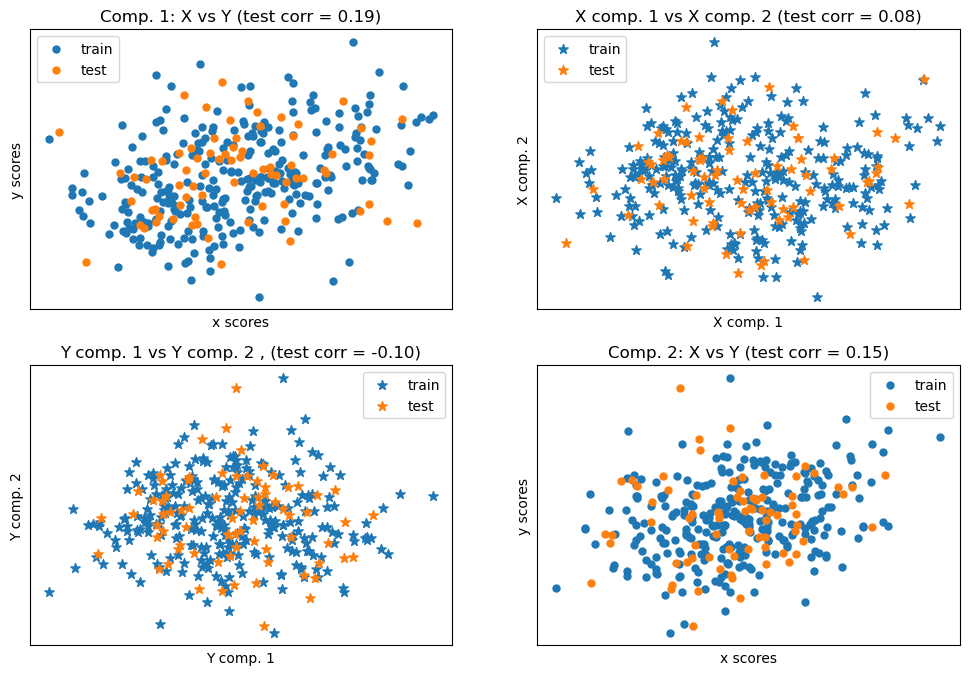

In [54]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 1: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train", marker="o", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test", marker="o", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title(
    "Comp. 2: X vs Y (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1]
)
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title(
    "X comp. 1 vs X comp. 2 (test corr = %.2f)"
    % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train", marker="*", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test", marker="*", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title(
    "Y comp. 1 vs Y comp. 2 , (test corr = %.2f)"
    % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1]
)
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

In [55]:
n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

In [57]:
print(X)
print(X.shape)
print(Y)
print(Y.shape)
print(B)

[[ 1.98004238  0.68847936 -0.94511127 ... -0.45943996 -0.92995303
   0.99872418]
 [ 0.71836789 -1.74265058  0.53420181 ...  0.10618095  0.35345227
   1.34892397]
 [ 0.33544446 -0.41284844  0.94147428 ... -0.33340118  0.4416486
   0.93143989]
 ...
 [-0.45321316 -0.71556642  0.52041578 ...  0.00374434 -1.30586346
   2.07448447]
 [-1.36813522 -0.26571897 -1.92310582 ... -0.72269781 -0.50131346
   0.61744654]
 [-0.73010292 -1.67828097  0.29894135 ...  0.69421526  1.69868561
   1.53522729]]
(1000, 10)
[[8.47077426 8.8631337  8.15323835]
 [2.31714048 2.10937351 1.73180085]
 [5.86979766 5.28843042 5.47446333]
 ...
 [3.43101654 2.56894315 1.74833311]
 [3.92264296 3.64055005 3.16266108]
 [0.20651983 3.00564496 2.54477237]]
(1000, 3)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [58]:
from sklearn.cross_decomposition import PLSRegression

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   2.  -0.   0.   0.  -0.   0.1  0.  -0.   0. ]
 [ 1.1  2.   0.1  0.1 -0.1  0.   0.  -0.  -0.   0. ]
 [ 1.   2.   0.   0.   0.  -0.   0.   0.  -0.   0. ]]


array([[4.97185685, 4.894577  , 4.9215571 ],
       [4.03104148, 3.98795772, 4.06078848],
       [9.25860177, 9.21758589, 9.25039094],
       ...,
       [5.33440031, 5.42267455, 5.35860466],
       [1.61207443, 1.52649089, 1.61510929],
       [4.97318984, 5.34136162, 5.0234033 ]])

In [34]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression, PLSCanonical
from sklearn.model_selection import KFold
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.io import savemat
from sklearn.metrics import r2_score

from scipy.stats import pearsonr, zscore

# 加载数据
alldata = pd.read_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/subtype1_ZvalueHAMD.csv')
alldata = np.array(alldata)

# 分离 X 和 Y
X = alldata[:, 1:225]
# X = np.array(X, dtype=np.float64)
# X = zscore(X, axis=0)

Y = alldata[:, 225:]
Y = np.array(Y, dtype=np.float64)
Y = zscore(Y, axis=0)

# 设置 PLS 参数
n_components = 10
n_permutations = 1000  # 置换次数
pls_scale = True
# 构建和拟合 PLS 模型
plsc = PLSCanonical(n_components=n_components)
plsc.fit(X, Y)
X_train_r, Y_train_r = plsc.transform(X,Y)

res = np.corrcoef(X_train_r[:, 0], Y_train_r[:, 0])[0, 1]

In [35]:
res

0.47886937276316033